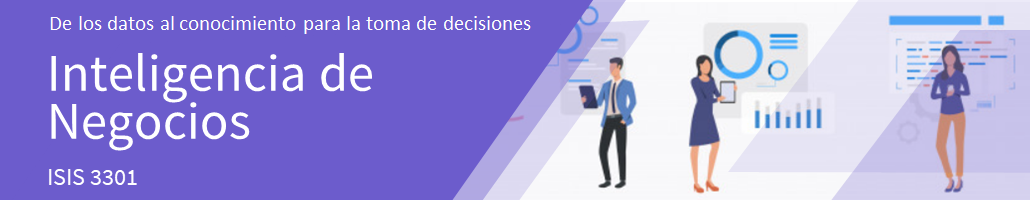

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolvimos la tarea de clasificación en un árbol de decisión con la librería scikit-learn.

1. Importación de librerías.
2. Carga de los datos.
3. Limpieza y preparación de los datos.
4. Construcción del modelo.
5. Interpretación del modelo.
6. Construcción del modelos con búsqueda de hiperparámetros.
7. Predicciones y probabilidad.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

### 2. Carga de los datos
A través de la librería pandas resalizamos la carga de datos del archivo "202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv". el separador que se usará para la carga es ";".

In [2]:
# Se cargan los datos. 
df=pd.read_csv('202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv', sep=';')

In [3]:
# Cantidad de datos y número de variables
df.shape

(768, 11)

In [4]:
df.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

Como podemos ver hay datos que deberían ser numéricos, pero por alguna razón estos son tipo "object".

In [5]:
# Mostrar los datos
df.head()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


La razón por la que algunos datos son tipo "object", es por un error que hay en los datos, donde ciertas columnas que tienen datos numéricos poseen el caracter "-". Este caracter hace que los datos no puedan ser numéricos, por lo que es necesario deshacerse de la fila que posee este caracter previamente mencionado.

In [6]:
# Buscamos la fila que posee este dato y procedemos a eliminarla
df.dtypes
df.loc[df['Pregnancies'] == '-']
up_df = df.drop(df.index[583])
up_df.shape

(767, 11)

In [7]:
# Hacemos una descripción de los datos una vez estos son transformados.
up_df['Pregnancies']=up_df['Pregnancies'].astype(int)
up_df['Glucose']=up_df['Glucose'].astype(int)
up_df['BloodPressure']=up_df['BloodPressure'].astype(int)
up_df['SkinThickness']=up_df['SkinThickness'].astype(int)
up_df['Insulin']=up_df['Insulin'].astype(int)
up_df['DiabetesPedigreeFunction']=up_df['DiabetesPedigreeFunction'].astype(int)
up_df['Outcome']=up_df['Outcome'].astype(int)
up_df.dtypes

Hair color                  object
Pregnancies                  int32
Glucose                      int32
City                        object
BloodPressure                int32
SkinThickness                int32
Insulin                      int32
BMI                          int64
DiabetesPedigreeFunction     int32
Age                          int64
Outcome                      int32
dtype: object

In [8]:
up_df.loc[df['Age'] > 200]

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
196,Black,1,105,New York,58,0,0,243,187,450,0
208,Black,1,96,New York,64,27,87,332,289,3256,0


In [9]:
up_df = up_df.drop(df.index[196])
up_df = up_df.drop(df.index[208])
up_df.shape

(765, 11)

In [10]:
up_df = up_df[up_df.Glucose != 0]
up_df.shape

(760, 11)

In [11]:
up_df = up_df[up_df.BloodPressure != 0]
up_df.shape

(725, 11)

In [12]:
up_df = up_df[up_df.Age > 21]
up_df.shape

(666, 11)

In [13]:
# Se observa si hay ausencias
up_df.isnull().sum()

Hair color                  0
Pregnancies                 0
Glucose                     0
City                        0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Ya tenemos los datos corregidos, los datos que eran tipo "object" ahora son enteros. Ya que se hizo este proceso se procederá a la limpieza y preparación de los datos.

### 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados a la correción de los datos que son tipo "object", pero deberían ser de un tipo numérico.

In [14]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
up = up_df


#### Eliminación registros con ausencias
No hay registros con ausencias como se vio en la anterior parte del notebook.
#### Eliminación de registros duplicados.
No hay necesidad ya que no hay ningún registro duplicado

In [15]:
up.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,666.000000,666.000000,666.000000,666.00000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,4.112613,122.948949,72.941441,21.57958,85.055556,296.534535,437.379880,34.516517,0.367868
std,3.386074,31.239176,12.300664,15.97537,117.441247,112.374011,343.766464,11.749152,0.482588
min,0.000000,44.000000,30.000000,0.00000,0.000000,0.000000,1.000000,22.000000,0.000000
25%,1.000000,100.000000,65.000000,0.00000,0.000000,259.000000,207.000000,25.000000,0.000000
50%,3.000000,119.000000,72.000000,25.00000,48.000000,316.000000,337.500000,31.000000,0.000000
75%,6.000000,144.000000,80.000000,33.00000,134.250000,362.750000,610.750000,42.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,671.000000,2329.000000,81.000000,1.000000


Como podemos ver todas las columnas tienen la misma cantidad de datos, por lo que todas las columnas estan completas.

In [16]:
# Cantidad de datos y número de variables
up.shape

(666, 11)

In [17]:
# Podemos ver los estadísticos de la variable "Outcome"
up['Outcome'].describe()

count    666.000000
mean       0.367868
std        0.482588
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

Como podemos ver, esta variable "Outcome", ya es de tipo "int", por lo que no es necesario hacerle una trandformación a esta columna, ya que cumple con los estándares para aplicarla a un árbol de decisión, entonces no es necesario crear una columna tipo Outcome_label, ya que esta ya tiene el tipo de datos adecuado.

In [18]:
up.head()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
4,Black,0,137,New York,40,35,168,431,2288,33,1
5,Black,5,116,New York,74,0,0,256,201,30,0


In [19]:
# Cantidad de datos de cada clase
up.value_counts(up['Outcome'])

Outcome
0    421
1    245
dtype: int64

In [20]:
# Eliminaremos las variables que consideramos no son útiles, que son City y Hair color, para la tarea que queremos resolver..
up2 = up.drop(['City', 'Hair color'], axis=1)
up2.dtypes

Pregnancies                 int32
Glucose                     int32
BloodPressure               int32
SkinThickness               int32
Insulin                     int32
BMI                         int64
DiabetesPedigreeFunction    int32
Age                         int64
Outcome                     int32
dtype: object

Scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números. Esto ya se hizo como se puede ver en el query de arriba.

In [21]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = up2.dtypes[(up2.dtypes == np.int64) | (up2.dtypes == np.float64) | (up2.dtypes == np.int32)].index 
number_cols = up2.select_dtypes(include = ['int64','float','int32']).columns
number_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
da = up2[number_cols]

In [23]:
# Podemos ver como quedaron los datos
da.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,336,627,50,1
1,1,85,66,29,0,266,351,31,0
2,8,183,64,0,0,233,672,32,1
4,0,137,40,35,168,431,2288,33,1
5,5,116,74,0,0,256,201,30,0


In [24]:
# Revisión del total de registros
da.shape

(666, 9)

### 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [25]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = da['Outcome']
# Del conjunto de datos se elimina la variable "Outcome"
X = da.drop(['Outcome'], axis=1)

In [26]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.68, random_state=0)

In [27]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [29]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [30]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[214,  76],
       [ 65,  98]], dtype=int64)

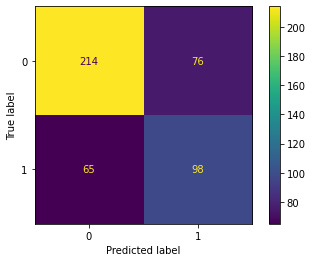

In [31]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

También generamos diferentes métricas de rendimiento como la excatitud, el recall, la precisión y la puntuación F1. 

In [32]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.69
Recall: 0.6012269938650306
Precisión: 0.5632183908045977
Puntuación F1: 0.5816023738872403


Para tener una panorama completo generamos un reporte.

In [33]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       290
           1       0.56      0.60      0.58       163

    accuracy                           0.69       453
   macro avg       0.67      0.67      0.67       453
weighted avg       0.69      0.69      0.69       453



Como podemos ver no tenemos una predicción exacta, por lo que no tenemos ninguna columna que se utilizó para calcular la variable objetivo, dentro de las variables de entrada

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.63
Recall: 0.525
Precisión: 0.40384615384615385
Puntuación F1: 0.4565217391304348


In [35]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        94
           1       0.40      0.53      0.46        40

    accuracy                           0.63       134
   macro avg       0.59      0.60      0.59       134
weighted avg       0.66      0.63      0.64       134



In [36]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 1.00
Recall: 1.0
Precisión: 1.0
Puntuación F1: 1.0


In [37]:
# Mostrar reporte de clasificación
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       205

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



### 5. Interpretación del modelo.
Lo siguiente que haremos es la interpretación de cuáles son los atributos más importante a partir del modelo que generamos con mayor nivel de pureza. 

In [38]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= arbol.feature_importances_
importancia

array([0.11660013, 0.30956173, 0.06199402, 0.06757223, 0.04237626,
       0.11768708, 0.13644888, 0.14775966])

In [39]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.309562
1,Age,0.147760
2,DiabetesPedigreeFunction,0.136449
3,BMI,0.117687
4,Pregnancies,0.116600
5,SkinThickness,0.067572
6,BloodPressure,0.061994
7,Insulin,0.042376


Como podemos ver, Glucose es el atributo con mayor importancia. En sí esto tiene sentido, ya que la diabetes es generada por un exceso de glucosa en la sangre.

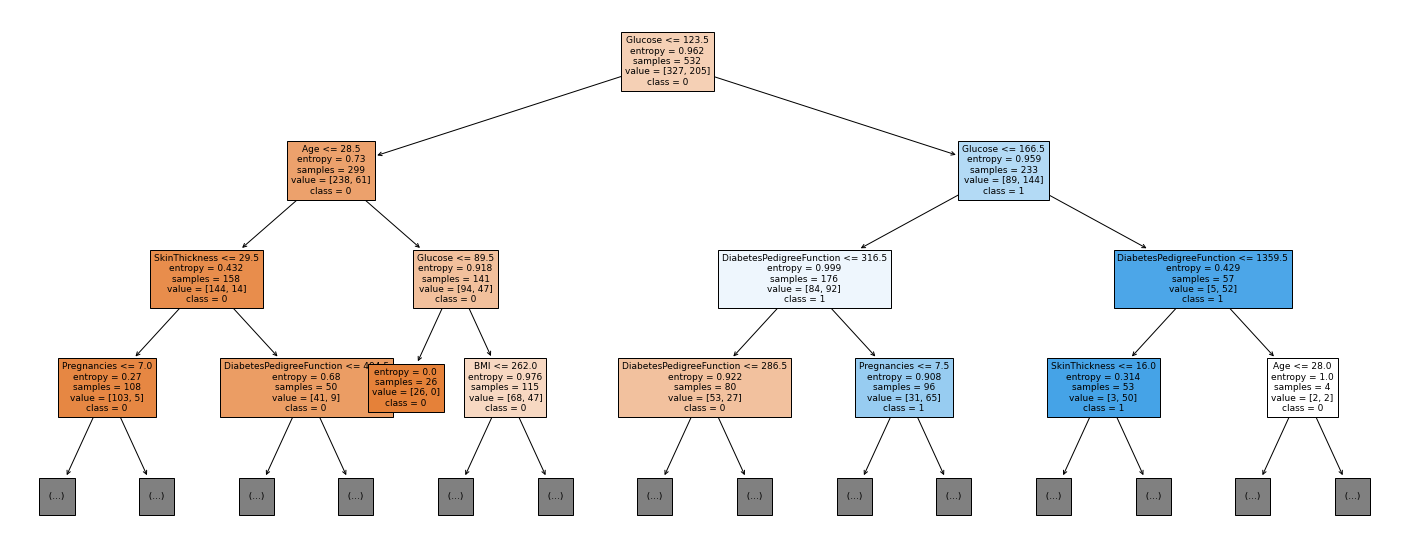

In [40]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [161]:
# También guardamos esta figura como una imagen.
fig.savefig("decistion_tree_lab9.png")

### 6. Construcción del modelos con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno



Primero utilizaremos un conjunto de validación.

In [41]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.65, random_state = 0)

In [42]:
# Fijemos un valor de max_depth en 2, construyamos el modelo y probemos sobre validación. Utilicemos la exactitud como métrica 
# de rendimiento para hacer la selección.
arbol = DecisionTreeClassifier(criterion='gini', max_depth = 6, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [43]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.72


In [44]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [45]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.87
Exactitud sobre test: 0.63


In [46]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [47]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.93
Exactitud sobre test: 0.66


In [48]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [49]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.64


In [50]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='gini', max_depth = 6, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [51]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.72


Scikit-learn ofrece algunos métodos que automatizan el proceso de buscar los valores de los hiperparámetros. Uno de ellos es GridSearchCV, el cual se basa en la validación cruzada de k-particiones. Este es el que utilizaremos a continuación.

In [52]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [53]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [54]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [55]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [56]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [57]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.72


In [58]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        94
           1       0.53      0.65      0.58        40

    accuracy                           0.72       134
   macro avg       0.68      0.70      0.69       134
weighted avg       0.74      0.72      0.73       134



### 7. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión vamos a obtener la probabilidad de que un dato sea clasificado como de una clase particular, si este tiene diabetes o no. 

In [127]:
#tomamos un dato del conjunto de test y aplicamos el método "predict_proba".
y_pred_test = arbol_final.predict_proba(X_test.iloc[[55]])

In [128]:
print(y_pred_test)

[[0.58139535 0.41860465]]


In [216]:
# Para saber el orden de las clases utilizamos el atributo "classes_" del modelo:
arbol_final.classes_

array([0, 1])

Como podemos observar cuando creamos la variable clase, el conjunto de datos está balanceado.